<a href="https://colab.research.google.com/github/dikoharyadhanto/Pandas-Documentation/blob/main/007_Aggregation_GroupBy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teknik agregasi diperlukan ketika mau melihat dataset dengan view yang berbeda, bisa set data tersebut akan dikelompokkan seperti apa, yang kemudian juga bisa menerapkan beberapa fungsi atau metode statistik ke hasil group dataset itu untuk mengetahui behavior dari data tersebut secara summary/overview.

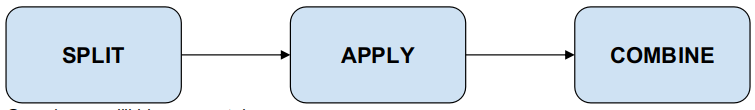

Groupby memiliki konsep untuk
- Split: melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok
- Apply: menerapkan fungsi pada masing-masing kelompok tersebut
- Combine: mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe

# **Review Inspeksi Data**

In [1]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())

Lima data teratas:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]


In [2]:
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 2   country                 4000 non-null   object 
 3   pollutant               4000 non-null   object 
 4   value                   4000 non-null   float64
 5   timestamp               4000 non-null   object 
 6   unit                    4000 non-null   object 
 7   source_name             4000 non-null   object 
 8   latitude                4000 non-null   float64
 9   longitude               4000 non-null   float64
 10  averaged_over_in_hours  3634 non-null   float64
dtypes: float64(4), object(7)
memory usage: 343.9+ KB
Info global_air_quality:
 None


In [3]:
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())

Count tanpa groupby:
 location                  3997
city                      3966
country                   4000
pollutant                 4000
value                     4000
timestamp                 4000
unit                      4000
source_name               4000
latitude                  4000
longitude                 4000
averaged_over_in_hours    3634
dtype: int64


In [4]:
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Count dengan groupby (5 data teratas):
              location  city  ...  longitude  averaged_over_in_hours
source_name                  ...                                   
ARPALAZIO          72    72  ...         72                      72
Agaar.mn           27    27  ...         27                       0
AirNow           1712  1681  ...       1715                    1715
Andalucia          71    71  ...         71                      71
Anqing              4     4  ...          4                       4

[5 rows x 10 columns]


Terdapat perbedaan antara melakukan count dengan groupby dan tanpa groupby
1. Terdapat index apa yang di specify as groupby
2. Perhitungan jadi berdasarkan apa yang di specify as groupby
3. Overall, lebih mudah untuk membaca data summary yang telah di groupby

# **Groupby dan Aggregasi dengan Fungsi Statistik Dasar**

menerapkan `groupby` dan fungsi aggregasi `mean` dan `std`untuk menentukan nilai rata-rata dan standar deviasi dari masing-masing kelompok data dari dataset

In [5]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


In [6]:
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())

Rata-rata pollutant (5 teratas):
           value                         ...                                 
pollutant    bc          co        no2  ...       pm10       pm25        so2
country                                 ...                                 
AR          0.0    0.000000   0.000000  ...   0.000000  18.100000   0.000000
AU          0.0    0.000000   0.000000  ...   0.000000   3.900000   0.000000
BA          0.0  475.833333  19.500000  ...  40.333333   0.000000  18.000000
CA          0.0    0.036818   0.000355  ...   0.836364   3.433601   0.000091
CL          0.0    0.000000  21.000000  ...   0.000000   0.000000   0.000000

[5 rows x 7 columns]


In [7]:
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Standar deviasi pollutant (5 teratas):
         value                                                                 
           bc          co        no2        o3       pm10      pm25        so2
country                                                                       
AR        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
AU        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
BA        0.0  536.925476  11.945711  8.207720  46.701891  0.000000  30.403947
CA        0.0    0.089841   0.000750  0.019323   1.713052  2.286509   0.000302
CL        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000


[3] Group berdasarkan country dan terapkan aggregasi sum, method `.sum()` setelah penerapan method `.groupby()` digunakan untuk mencari total nilai dari tiap kelompok

In [8]:
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())

Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.000000  108.000
CA          0.0     0.405    0.0039   0.285593    9.2  37.769608    0.001
CL          0.0     0.000   21.0000   0.000000    0.0   0.000000    0.000


[4] Group berdasarkan country dan terapkan aggregasi `nunique`, method `.nunique()` setelah penerapan method `.groupby()` digunakan untuk mencari berapakah jumlah unique value dari tiap kelompok

In [9]:
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Jumlah unique value pollutant (5 teratas):
           value                        
pollutant    bc co no2 o3 pm10 pm25 so2
country                                
AR            1  1   1  1    1    1   1
AU            1  1   1  1    1    1   1
BA            1  6   6  4    5    1   4
CA            1  3   4  9    4   10   2
CL            1  1   1  1    1    1   1


[5] Group berdasarkan country dan terapkan aggregasi min, method `.min()` setelah penerapan method `.groupby()`digunakan untuk memunculkan nilai terkecil dari tiap kelompok

In [10]:
# Group berdasarkan country dan terapkan aggregasi min
pollutant_min = pollutant.groupby('country').min()
print('nilai min pollutant (5 teratas):\n', pollutant_min.head())

nilai min pollutant (5 teratas):
           value                                
pollutant    bc   co   no2   o3 pm10  pm25  so2
country                                        
AR          0.0  0.0   0.0  0.0  0.0  18.1  0.0
AU          0.0  0.0   0.0  0.0  0.0   3.9  0.0
BA          0.0  0.0   0.0  0.0  0.0   0.0  0.0
CA          0.0  0.0   0.0  0.0  0.0   0.0  0.0
CL          0.0  0.0  21.0  0.0  0.0   0.0  0.0


[6] Group berdasarkan country dan terapkan aggregasi max, method `.max()` setelah penerapan method `.groupby()` digunakan untuk memunculkan nilai terbesar dari tiap kelompok

In [11]:
# Group berdasarkan country dan terapkan aggregasi max
pollutant_max = pollutant.groupby('country').max()
print('nilai max pollutant (5 teratas):\n', pollutant_max.head())

nilai max pollutant (5 teratas):
           value                                                   
pollutant    bc        co      no2         o3   pm10  pm25     so2
country                                                           
AR          0.0     0.000   0.0000   0.000000    0.0  18.1   0.000
AU          0.0     0.000   0.0000   0.000000    0.0   3.9   0.000
BA          0.0  1508.000  32.0000  21.000000  100.0   0.0  78.000
CA          0.0     0.285   0.0024   0.048333    5.2   6.0   0.001
CL          0.0     0.000  21.0000   0.000000    0.0   0.0   0.000


Gunakanlah method `.first()` dan `.last()` untuk aggregasi setelah penerapan `.groupby()` yang masing-masingnya bertujuan untuk memunculkan item pertama dan item terakhir dari tiap kelompok.

In [12]:
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())

Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL          0.0    0.000  21.0000  0.000000  0.0   0.0  0.0


In [13]:
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Item terakhir pollutant (5 teratas):
           value                                      
pollutant    bc     co   no2     o3  pm10  pm25   so2
country                                              
AR          0.0    0.0   0.0  0.000   0.0  18.1   0.0
AU          0.0    0.0   0.0  0.000   0.0   3.9   0.0
BA          0.0  292.0  29.0  0.000  96.0   0.0  78.0
CA          0.0    0.0   0.0  0.036   3.0   0.0   0.0
CL          0.0    0.0  21.0  0.000   0.0   0.0   0.0


# **Groupby dengan Multiple Aggregations**

menggunakan grouby dengan multiple aggregations yang berupa kombinasi antara beberapa fungsi.

In [14]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min','median','mean','max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Multiple aggregations (5 teratas):
         value                        ...                                     
           bc                    co  ...  pm25  so2                          
          min median mean  max  min  ...   max  min median       mean     max
country                              ...                                     
AR        0.0    0.0  0.0  0.0  0.0  ...  18.1  0.0    0.0   0.000000   0.000
AU        0.0    0.0  0.0  0.0  0

# **Groupby dengan Custom Aggregations**

Dengan membuat sebuah Python function (user defined) dapat menggunakan sebagai custom aggregation pada dataframe yang telah digroupby.

In [15]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg =pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc      co       no2        o3  pm10      pm25   so2
country                                                        
AR        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA        0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA        0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


# **Groupby dengan Custom Aggregations by dict**

Penggunaan custom aggregation lainnya pada dataframe yang telah digroupby dapat dilakukan dengan mempasskan sebuah dict yang berisi 'key' dict sebagai nama kolomnya dan 'value' dict adalah fungsi untuk aggregasi, baik user defined function atau yang telah tersedia.

In [16]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


tentukanlah median untuk kolom 'pm10' serta iqr untuk kolom 'pm25' dan 'so2'. Tampilkan pula 5 data teratas saja.

In [17]:
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25':iqr,
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())


Cetak 5 data teratas custom_agg_dict:
          pm10      pm25   so2
country                      
AR        0.0  0.000000   0.0
AU        0.0  0.000000   0.0
BA       23.0  0.000000  17.0
CA        0.0  3.876471   0.0
CL        0.0  0.000000   0.0
